[[ 0.79911221  0.6011819 ]
 [-0.6011819   0.79911221]]


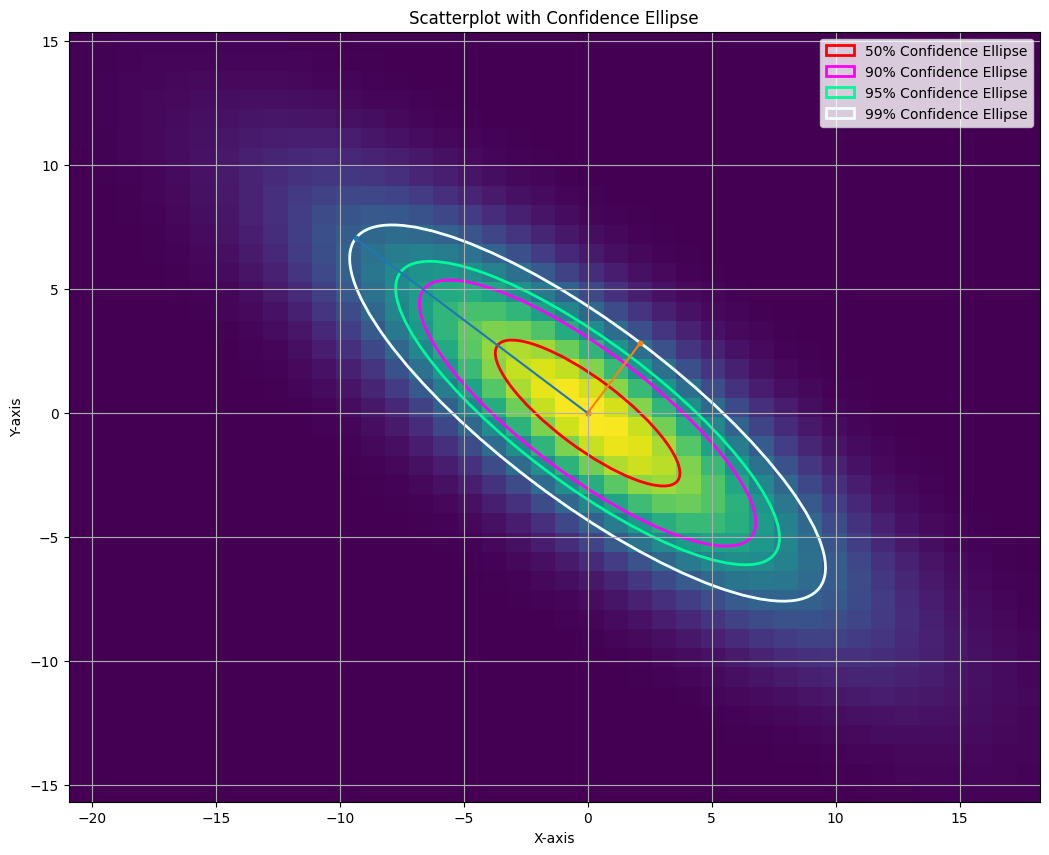

In [165]:
from matplotlib.patches import Ellipse
import matplotlib.transforms as transforms
from scipy.stats import chi2


fig, ax = plt.subplots(1, figsize=(15, 10))




ax.imshow(pdf, origin='lower', extent=(x.min(), x.max(), y.min(), y.max()))
ax.set_aspect('equal')

confidence_level = [0.5,0.9,0.95,0.99] 
col = ['red', 'fuchsia', 'mediumspringgreen', 'azure']
df = 2 
for j in range (0,4):
    chi2_val = chi2.ppf(confidence_level[j], df)
    eigenvalues, eigenvectors = np.linalg.eig(B)  #собств знач собств векторы
    major_axis_length = np.sqrt(chi2_val * eigenvalues[0])
    minor_axis_length = np.sqrt(chi2_val * eigenvalues[1])
    angle = np.degrees(np.arctan2((-1)*eigenvectors[0, 1], eigenvectors[0, 0]))

    ellipse = plt.matplotlib.patches.Ellipse([0,0], width=major_axis_length, height=minor_axis_length, angle=angle,
                                        edgecolor=col[j], fill=False, linewidth=2, label=f'{int(confidence_level[j]*100)}% Confidence Ellipse')
    plt.gca().add_patch(ellipse)

    plt.legend()
    plt.xlabel('X-axis')
    plt.ylabel('Y-axis')
print (eigenvectors)
s = [0,(eigenvectors[0,0]*(-1))*major_axis_length/2]
t = [0, eigenvectors[0, 1]*major_axis_length/2]
plt.scatter(s, t, s = 10) 
plt.plot(s, t)
s = [0,eigenvectors[1,0]*(-1)*minor_axis_length/2]
t = [0, eigenvectors[1, 1]*minor_axis_length/2]
plt.scatter(s, t,s = 10) 
plt.plot(s, t)
plt.title('Scatterplot with Confidence Ellipse')
plt.grid(True)
plt.show()



